![Xilinx Logo](images/xilinx_logo.png "Xilinx Logo")

# 1. Introduction

This notebook demonstrates how to use the APM library for performance monitoring of read and write throughput in the MIPI, accelerator and HDMI pipelines.

The APM library configures and reads out the AXI performance monitors (APM) that are added into the PL design. The following is a list of monitoring slots and configured metrics:
* HDMI primary plane read throughput
* HDMI overlay planes 0 to 3 read throughput
* HDMI overlay planes 4 to 7 read throughput
* Accelerator write throughput
* Accelerator read throughput
* MIPI write throughput

In this notebook, you will:
1. Create a list of desired APM metrics to be recorded
2. Plot the data in a real-time graph

# 2. Imports and Initialization

Import all python modules required for this notebook. The ``libxapm`` module provides the APM monitoring functionality.

In [1]:
from IPython.display import clear_output
import libxapm
from matplotlib import pyplot as plt
import numpy as np
import time

%matplotlib inline

# 3. Create and Configure the APMs with their Metrics

Create a list consisting of the APM metrics you want to measure and create the APM object. The APM configuration is defined by the ``libxapm.preset`` attribute inside the ``libxapm`` library.

In [2]:
APM_LIST = libxapm.APM(libxapm.preset)

# 4. Read and Plot the Memory Throughput Values in Real-Time

Create a function ``autolabel`` that prints the current values inside the bar graph.

In an infinite loop, read the APM values using the APM object, configure various properties and plot the graph.

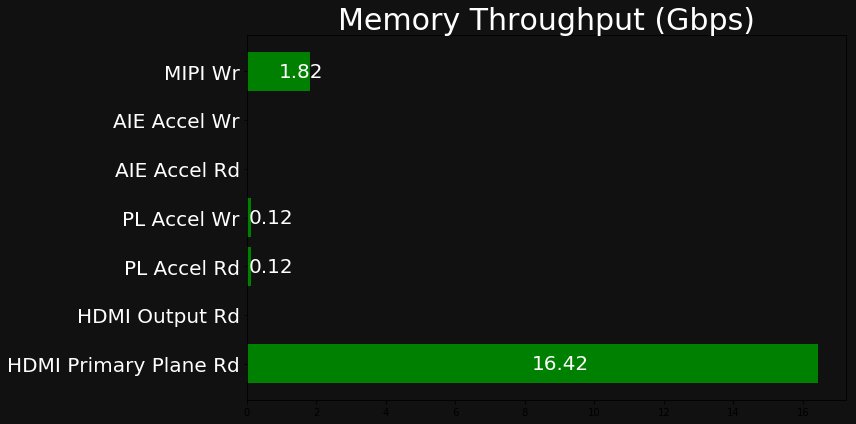

In [ ]:
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        if width > 0:
            ax.text(rect.get_x() + rect.get_width()/2, rect.get_y() + rect.get_height()/2.,
                    '%.2f' % width, ha='left', va='center', color='white',size='20')

while True:
    clear_output(wait=True)
    
    # read APM values and add them to a list
    # the values for HDMI overlay planes 0 to 3 and 4 to 7 are added
    hdmi_primary_plane_rd = round(APM_LIST.port[7].getThroughput(libxapm.Gbps),2)
    hdmi_o_rd = round(APM_LIST.port[0].getThroughput(libxapm.Gbps)
                      + APM_LIST.port[1].getThroughput(libxapm.Gbps),2)
    pl_accel_rd = round(APM_LIST.port[2].getThroughput(libxapm.Gbps),2)
    pl_accel_wr = round(APM_LIST.port[3].getThroughput(libxapm.Gbps),2)
    aie_accel_rd = round(APM_LIST.port[4].getThroughput(libxapm.Gbps),2)
    aie_accel_wr = round(APM_LIST.port[5].getThroughput(libxapm.Gbps),2)
    mipi_wr = round(APM_LIST.port[6].getThroughput(libxapm.Gbps),2)
    read = [
        hdmi_primary_plane_rd,
        hdmi_o_rd,  
        pl_accel_rd, 
        pl_accel_wr, 
        aie_accel_rd, 
        aie_accel_wr, 
        mipi_wr
           ]

    # create matching list of labels
    labels = [
        'HDMI Primary Plane Rd',
        'HDMI Output Rd',
        'PL Accel Rd',
        'PL Accel Wr',
        'AIE Accel Rd',
        'AIE Accel Wr',
        'MIPI Wr'
    ]
    fig, ax = plt.subplots()
    fig.set_facecolor('#111111') # match color of jupyterlab theme
    fig.set_size_inches(12, 6)

    x = np.arange(0, 1.75, 0.25)  # the label locations
    width = 0.2  # the width of the bars
    colors = ['g' for i in range(len(labels))]
    rects1 = ax.barh(x, read, width, color=colors) # plot bars
    autolabel(rects1) # print values inside bars

    ax.set_title('Memory Throughput (Gbps)', color='white', size='30')
    ax.set_facecolor('#111111') # match color of jupyterlab theme    
    ax.set_yticks(x)
    ax.set_yticklabels(labels, color='white', size='20') # print labels

    plt.tight_layout()
    plt.show()

# 5. Summary

In this notebook you learned how to:
1. Import and use the APM Library
2. Display specific metrics on a live plot

<center>Copyright© 2019 Xilinx</center>